In [1]:
# !pip install ipython-autotime library to count run time
%load_ext autotime

time: 0 ns (started: 2021-09-19 23:55:15 +08:00)


In [2]:
import cv2
import os
from skimage.util import random_noise
from imwatermark import WatermarkEncoder
from blind_watermark import WaterMark
from imwatermark import WatermarkDecoder
import numpy as np
import random
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import dataframe_image as dfi

time: 2.89 s (started: 2021-09-19 23:55:15 +08:00)


# Part A: Encode

In [3]:
#Encode DWT A

infolder='in_img'
outfolder=os.path.join('out_img','algo_a')
in_img_list = os.listdir(infolder)
text='zhen'

for img in in_img_list:
    in_path = os.path.join(infolder,img)
    out_name='Algo_A_'+img
    out_path = os.path.join(outfolder,out_name)
    
   
    encoder = WaterMark(password_img=1, password_wm=1)
    encoder.read_img(in_path)
    encoder.read_wm(text, mode='str')
    encoder.embed(out_path)
     
    print("Done Encoding: " + out_path)

Done Encoding: out_img\algo_a\Algo_A_MRI_A.png
Done Encoding: out_img\algo_a\Algo_A_MRI_B.png
Done Encoding: out_img\algo_a\Algo_A_MRI_C.png
Done Encoding: out_img\algo_a\Algo_A_MRI_D.png
Done Encoding: out_img\algo_a\Algo_A_MRI_E.png
Done Encoding: out_img\algo_a\Algo_A_MRI_F.png
Done Encoding: out_img\algo_a\Algo_A_MRI_G.png
Done Encoding: out_img\algo_a\Algo_A_MRI_H.png
Done Encoding: out_img\algo_a\Algo_A_MRI_I.png
Done Encoding: out_img\algo_a\Algo_A_MRI_J.png
Done Encoding: out_img\algo_a\Algo_A_MRI_K.png
Done Encoding: out_img\algo_a\Algo_A_MRI_L.png
Done Encoding: out_img\algo_a\Algo_A_MRI_M.png
Done Encoding: out_img\algo_a\Algo_A_MRI_N.png
Done Encoding: out_img\algo_a\Algo_A_MRI_O.png
Done Encoding: out_img\algo_a\Algo_A_MRI_P.png
Done Encoding: out_img\algo_a\Algo_A_MRI_Q.png
Done Encoding: out_img\algo_a\Algo_A_MRI_R.png
Done Encoding: out_img\algo_a\Algo_A_MRI_S.png
Done Encoding: out_img\algo_a\Algo_A_MRI_T.png
time: 39.8 s (started: 2021-09-19 23:55:18 +08:00)


In [4]:
#Encode dwtDct B

infolder='in_img'
outfolder=os.path.join('out_img','algo_b')
in_img_list = os.listdir(infolder)
text='zhen'

encoder = WatermarkEncoder()


for img in in_img_list:
    in_path = os.path.join(infolder,img)
    out_name='Algo_B_'+img
    out_path = os.path.join(outfolder,out_name)
    
    in_img = cv2.imread(in_path)
    
    encoder.set_watermark('bytes', text.encode('utf-8'))
    
    img_encoded = encoder.encode(in_img,'dwtDct')
    
    cv2.imwrite(out_path,img_encoded)
    
    print("Done Encoding: " + out_path)
    


Done Encoding: out_img\algo_b\Algo_B_MRI_A.png
Done Encoding: out_img\algo_b\Algo_B_MRI_B.png
Done Encoding: out_img\algo_b\Algo_B_MRI_C.png
Done Encoding: out_img\algo_b\Algo_B_MRI_D.png
Done Encoding: out_img\algo_b\Algo_B_MRI_E.png
Done Encoding: out_img\algo_b\Algo_B_MRI_F.png
Done Encoding: out_img\algo_b\Algo_B_MRI_G.png
Done Encoding: out_img\algo_b\Algo_B_MRI_H.png
Done Encoding: out_img\algo_b\Algo_B_MRI_I.png
Done Encoding: out_img\algo_b\Algo_B_MRI_J.png
Done Encoding: out_img\algo_b\Algo_B_MRI_K.png
Done Encoding: out_img\algo_b\Algo_B_MRI_L.png
Done Encoding: out_img\algo_b\Algo_B_MRI_M.png
Done Encoding: out_img\algo_b\Algo_B_MRI_N.png
Done Encoding: out_img\algo_b\Algo_B_MRI_O.png
Done Encoding: out_img\algo_b\Algo_B_MRI_P.png
Done Encoding: out_img\algo_b\Algo_B_MRI_Q.png
Done Encoding: out_img\algo_b\Algo_B_MRI_R.png
Done Encoding: out_img\algo_b\Algo_B_MRI_S.png
Done Encoding: out_img\algo_b\Algo_B_MRI_T.png
time: 3.45 s (started: 2021-09-19 23:55:58 +08:00)


In [5]:
#encode DwtDctSvd C

infolder='in_img'
outfolder=os.path.join('out_img','algo_c')
in_img_list = os.listdir(infolder)
text='zhen'

encoder = WatermarkEncoder()

for img in in_img_list:
    in_path = os.path.join(infolder,img)
    out_name='Algo_C_'+img
    out_path = os.path.join(outfolder,out_name)
    
    in_img = cv2.imread(in_path)
    
    encoder.set_watermark('bytes', text.encode('utf-8'))
    
    img_encoded = encoder.encode(in_img,'dwtDctSvd')
    
    cv2.imwrite(out_path,img_encoded)
    
    print("Done Encoding: " + out_path)
    


Done Encoding: out_img\algo_c\Algo_C_MRI_A.png
Done Encoding: out_img\algo_c\Algo_C_MRI_B.png
Done Encoding: out_img\algo_c\Algo_C_MRI_C.png
Done Encoding: out_img\algo_c\Algo_C_MRI_D.png
Done Encoding: out_img\algo_c\Algo_C_MRI_E.png
Done Encoding: out_img\algo_c\Algo_C_MRI_F.png
Done Encoding: out_img\algo_c\Algo_C_MRI_G.png
Done Encoding: out_img\algo_c\Algo_C_MRI_H.png
Done Encoding: out_img\algo_c\Algo_C_MRI_I.png
Done Encoding: out_img\algo_c\Algo_C_MRI_J.png
Done Encoding: out_img\algo_c\Algo_C_MRI_K.png
Done Encoding: out_img\algo_c\Algo_C_MRI_L.png
Done Encoding: out_img\algo_c\Algo_C_MRI_M.png
Done Encoding: out_img\algo_c\Algo_C_MRI_N.png
Done Encoding: out_img\algo_c\Algo_C_MRI_O.png
Done Encoding: out_img\algo_c\Algo_C_MRI_P.png
Done Encoding: out_img\algo_c\Algo_C_MRI_Q.png
Done Encoding: out_img\algo_c\Algo_C_MRI_R.png
Done Encoding: out_img\algo_c\Algo_C_MRI_S.png
Done Encoding: out_img\algo_c\Algo_C_MRI_T.png
time: 9.02 s (started: 2021-09-19 23:56:02 +08:00)


In [6]:
#encode RivaGAN D

infolder='in_img'
outfolder=os.path.join('out_img','algo_d')
in_img_list = os.listdir(infolder)
text='zhen'

encoder = WatermarkEncoder()

for img in in_img_list:
    in_path = os.path.join(infolder,img)
    out_name='Algo_D_'+img
    out_path = os.path.join(outfolder,out_name)
    
    in_img = cv2.imread(in_path)
    
    encoder.set_watermark('bytes', text.encode('utf-8'))
    encoder.loadModel()
    img_encoded = encoder.encode(in_img,'rivaGan')
    
    cv2.imwrite(out_path,img_encoded)
    
    print("Done Encoding: " + out_path)
    


Done Encoding: out_img\algo_d\Algo_D_MRI_A.png
Done Encoding: out_img\algo_d\Algo_D_MRI_B.png
Done Encoding: out_img\algo_d\Algo_D_MRI_C.png
Done Encoding: out_img\algo_d\Algo_D_MRI_D.png
Done Encoding: out_img\algo_d\Algo_D_MRI_E.png
Done Encoding: out_img\algo_d\Algo_D_MRI_F.png
Done Encoding: out_img\algo_d\Algo_D_MRI_G.png
Done Encoding: out_img\algo_d\Algo_D_MRI_H.png
Done Encoding: out_img\algo_d\Algo_D_MRI_I.png
Done Encoding: out_img\algo_d\Algo_D_MRI_J.png
Done Encoding: out_img\algo_d\Algo_D_MRI_K.png
Done Encoding: out_img\algo_d\Algo_D_MRI_L.png
Done Encoding: out_img\algo_d\Algo_D_MRI_M.png
Done Encoding: out_img\algo_d\Algo_D_MRI_N.png
Done Encoding: out_img\algo_d\Algo_D_MRI_O.png
Done Encoding: out_img\algo_d\Algo_D_MRI_P.png
Done Encoding: out_img\algo_d\Algo_D_MRI_Q.png
Done Encoding: out_img\algo_d\Algo_D_MRI_R.png
Done Encoding: out_img\algo_d\Algo_D_MRI_S.png
Done Encoding: out_img\algo_d\Algo_D_MRI_T.png
time: 21.8 s (started: 2021-09-19 23:56:11 +08:00)


# Part B: Attacking

In [7]:
#Attacking Methods

def gaussian(img, output_file_name):
    img_shape = img.shape
    gauss_img = random_noise(img, mode='gaussian', mean=0, var=0.01, clip= True)
    gauss_img = np.array(255*gauss_img, dtype = 'uint8')
    cv2.imwrite(output_file_name, gauss_img)

def salt_pepper(img, output_file_name):
    ratio = 0.1 #Probability of the noise
    #0.01 all pass?
    #0.1 algorithm d only partial pass
    snp_img = np.zeros(img.shape,np.uint8)
    thres = 1 - ratio
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < ratio:
                snp_img[i][j] = 0
            elif rdn > thres:
                snp_img[i][j] = 255
            else:
                snp_img[i][j] = img[i][j]
    cv2.imwrite(output_file_name, snp_img)
    
def speckle(img, output_file_name):
    speckle_img = random_noise(img, mode='speckle', mean=0, var=0.01, clip= True)
    # The above function returns a floating-point image on the range [0, 1], thus we changed it to 'uint8' and from [0,255]
    speckle_img = np.array(255*speckle_img, dtype = 'uint8')
    cv2.imwrite(output_file_name, speckle_img)
    
def poisson(img, output_file_name):
    img_shape = img.shape
    noise = np.random.poisson(20, img_shape)
    #30 all fail 
    output = img + noise
    cv2.imwrite(output_file_name, output)
    
def rotate(img, output_file_name, angle=10):
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D(center=(cols / 2, rows / 2), angle=angle, scale=1)
    output_img = cv2.warpAffine(img, M, (cols, rows))
    cv2.imwrite(output_file_name, output_img)
    
def upscale(img, output_file_name):
    img_shape = img.shape
    output_img = cv2.resize(img, None, fx=1.25, fy=1.25, interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(output_file_name, output_img)
    
def downscale(img, output_file_name):
    img_shape = img.shape
    output_img = cv2.resize(img, None, fx=0.75, fy=0.75, interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(output_file_name, output_img)
    
def averaging(img, output_file_name):
    img_shape = img.shape
    output_img = cv2.blur(img,(5,5)) 
    cv2.imwrite(output_file_name, output_img)
    
def gaussian_blurring(img, output_file_name):
    img_shape = img.shape
    output_img = cv2.GaussianBlur(img,(5,5),0) 
    cv2.imwrite(output_file_name, output_img)
    
def median_blurring(img, output_file_name):
    output_img = cv2.medianBlur(img,7)
    #5 all pass
    cv2.imwrite(output_file_name, output_img)
    
def bilateral_filtering(img, output_file_name):
    output_img = cv2.bilateralFilter(img,9,75,75)
    cv2.imwrite(output_file_name, output_img)
    
def sharpen_filtering(img, output_file_name):
    sharpen_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharped_img = cv2.filter2D(img, -1, sharpen_filter)
    cv2.imwrite(output_file_name, sharped_img)

def crop_horizontal(img, output_file_name):
    ratio = 0.5  
    #left 50% all pass
    img_shape = img.shape
    height = int(img_shape[0] * ratio)
    horizontal_img = img[:height, :, :]
    cv2.imwrite(output_file_name, horizontal_img)

def crop_vertical(img, output_file_name):
    ratio = 0.5
    img_shape = img.shape
    vertical = int(img_shape[1] * ratio)
    vertical_img = img[:, :vertical, :]
    cv2.imwrite(output_file_name, vertical_img)

def increase_brightness(img, output_file_name):
    ratio = 1.4 # 
    #+10% all pass
    #+50% algorithm D
    inc_bright_img = img * ratio
    inc_bright_img[inc_bright_img > 255] = 255
    cv2.imwrite(output_file_name, inc_bright_img)
    
def decrease_brightness(img, output_file_name):
    ratio = 0.6 
    # -50% brightness all pass
    dec_bright_img = img * ratio
    dec_bright_img[dec_bright_img > 255] = 255
    cv2.imwrite(output_file_name, dec_bright_img)
    
def masks(img, output_file_name):
    n = 5 # Set 2 mask
    ratio = 0.3 # mask ratio
    input_img_shape = img.shape
    mask_img = img.copy()
    for i in range(n):
        tmp = np.random.rand() * (1 - ratio)  # random one place to put mask，1-ratio to avoid overfloat
        start_height, end_height = int(tmp * input_img_shape[0]), int((tmp + ratio) * input_img_shape[0])
        tmp = np.random.rand() * (1 - ratio)
        start_width, end_width = int(tmp * input_img_shape[1]), int((tmp + ratio) * input_img_shape[1])

        mask_img[start_height:end_height, start_width:end_width, :] = 0
    cv2.imwrite(output_file_name, mask_img)
    
def init_attack(input_image, image_name):
    print('Attacking ' + image_name)
    
    a = image_name.split('.')[0]
    mri_name = a.split('_')[2]+'_'+a.split('_')[3]
    algo_name = a.split('_')[0]+'_'+a.split('_')[1]
    
    
    output_path=os.path.join('out_att',mri_name,algo_name.lower())
#     print(output_path)
    
    gaussian(input_image, os.path.join(output_path,'Gaussian_Noise.png'))
    salt_pepper(input_image, os.path.join(output_path,'Salt_Pepper.png'))
    speckle(input_image, os.path.join(output_path,'Speckle.png'))
    poisson(input_image, os.path.join(output_path,'Poisson.png'))
    rotate(input_image, os.path.join(output_path,'Rotate.png'), angle=10)
    upscale(input_image, os.path.join(output_path,'ScaleUp.png'))
    downscale(input_image, os.path.join(output_path,'ScaleDown.png'))
    averaging(input_image, os.path.join(output_path,'Averaging.png'))
    gaussian_blurring(input_image, os.path.join(output_path,'Gaussian_Blurring.png'))
    median_blurring(input_image, os.path.join(output_path,'Median_Blurring.png'))
    bilateral_filtering(input_image, os.path.join(output_path,'Bilateral_Filtering.png'))
    sharpen_filtering(input_image, os.path.join(output_path,'Sharpen_Filtering.png'))
    crop_horizontal(input_image, os.path.join(output_path,'Crop_Horizontal.png'))
    crop_vertical(input_image, os.path.join(output_path,'Crop_Vertical.png'))
    increase_brightness(input_image, os.path.join(output_path,'Brightness_Increase.png'))
    decrease_brightness(input_image, os.path.join(output_path,'Brightness_Decrease.png'))
    masks(input_image, os.path.join(output_path,'Masks.png'))
    cv2.imwrite(os.path.join(output_path,'JPG.jpg'), input_image)


time: 16 ms (started: 2021-09-19 23:56:33 +08:00)


In [8]:
infolder=os.path.join('out_img')
outfolder=os.path.join('out_att')

img_folder_list = os.listdir(infolder) 

for folder in img_folder_list: 
#     print(folder)
    in_img_list = os.listdir(os.path.join(infolder,folder)) 
    
    for img_path in in_img_list: 
#         print(img_path)
        img = cv2.imread(os.path.join(infolder,folder,img_path))
        init_attack(img,img_path)   
        

Attacking Algo_A_MRI_A.png
Attacking Algo_A_MRI_B.png
Attacking Algo_A_MRI_C.png
Attacking Algo_A_MRI_D.png
Attacking Algo_A_MRI_E.png
Attacking Algo_A_MRI_F.png
Attacking Algo_A_MRI_G.png
Attacking Algo_A_MRI_H.png
Attacking Algo_A_MRI_I.png
Attacking Algo_A_MRI_J.png
Attacking Algo_A_MRI_K.png
Attacking Algo_A_MRI_L.png
Attacking Algo_A_MRI_M.png
Attacking Algo_A_MRI_N.png
Attacking Algo_A_MRI_O.png
Attacking Algo_A_MRI_P.png
Attacking Algo_A_MRI_Q.png
Attacking Algo_A_MRI_R.png
Attacking Algo_A_MRI_S.png
Attacking Algo_A_MRI_T.png
Attacking Algo_B_MRI_A.png
Attacking Algo_B_MRI_B.png
Attacking Algo_B_MRI_C.png
Attacking Algo_B_MRI_D.png
Attacking Algo_B_MRI_E.png
Attacking Algo_B_MRI_F.png
Attacking Algo_B_MRI_G.png
Attacking Algo_B_MRI_H.png
Attacking Algo_B_MRI_I.png
Attacking Algo_B_MRI_J.png
Attacking Algo_B_MRI_K.png
Attacking Algo_B_MRI_L.png
Attacking Algo_B_MRI_M.png
Attacking Algo_B_MRI_N.png
Attacking Algo_B_MRI_O.png
Attacking Algo_B_MRI_P.png
Attacking Algo_B_MRI_Q.png
A

# Part C: Decode

In [9]:
def algo_A(image_list, result):
    count = 1
    print('ALGORITHM A')
    print('===========')
    for img in image_list:
        name = os.path.basename(img)
        name = name.split('.')[0]
        name = name.replace('_','')
        print(str(count) + ': ' + name)

        try:
            bwm1=WaterMark(password_img=1,password_wm=1)
            output = bwm1.extract(img, wm_shape=31, mode='str')
            print('Decoded text: ' + output)
            if output == 'zhen':
                print('Result      : Pass')
                result.append('Pass')
            else:
                print('Result      : Fail')
                result.append('Fail')
        except:
            print('Decoded text: Error')
            print('Result      : Fail')
            result.append('Fail')
            pass
        
        count += 1
        print('-----')

    
def algo_B(image_list, result):
    count = 1
    print('ALGORITHM B')
    print('===========')
    for img in image_list:
        bgr = cv2.imread(img)
        name = os.path.basename(img)
        name = name.split('.')[0]
        name = name.replace('_','')
        print(str(count) + ': ' + name)

        try:
            decoder = WatermarkDecoder('bytes', 32)
            watermark = decoder.decode(bgr, 'dwtDct')
            output = watermark.decode('utf-8')
            print('Decoded text: ' + output)
            if output == 'zhen':
                print('Result      : Pass')
                result.append('Pass')
            else:
                print('Result      : Fail')
                result.append('Fail')
        except:
            print('Decoded text: Error')
            print('Result      : Fail')
            result.append('Fail')
            pass
        
        count += 1
        print('-----')
        
def algo_C(image_list, result):
    count = 1
    print('ALGORITHM C')
    print('===========')
    for img in image_list:
        bgr = cv2.imread(img)
        name = os.path.basename(img)
        name = name.split('.')[0]
        name = name.replace('_','')
        print(str(count) + ': ' + name)

        try:
            decoder = WatermarkDecoder('bytes', 32)
            watermark = decoder.decode(bgr, 'dwtDctSvd')
            output = watermark.decode('utf-8')
            print('Decoded text: ' + output)
            if output == 'zhen':
                print('Result      : Pass')
                result.append('Pass')
            else:
                print('Result      : Fail')
                result.append('Fail')
        except:
            print('Decoded text: Error')
            print('Result      : Fail')
            result.append('Fail')
            pass
        
        count += 1
        print('-----')
        
def algo_D(image_list, result):
    count = 1
    print('ALGORITHM D')
    print('===========')
    for img in image_list:
        bgr = cv2.imread(img)
        name = os.path.basename(img)
        name = name.split('.')[0]
        name = name.replace('_','')
        print(str(count) + ': ' + name)

        try:
            decoder = WatermarkDecoder('bytes', 32)
            decoder.loadModel()
            watermark = decoder.decode(bgr, 'rivaGan')
            output = watermark.decode('utf-8')
            print('Decoded text: ' + output)
            if output == 'zhen':
                print('Result      : Pass')
                result.append('Pass')
            else:
                print('Result      : Fail')
                result.append('Fail')
        except:
            print('Decoded text: Error')
            print('Result      : Fail')
            result.append('Fail')
            pass
        
        count += 1
        print('-----')
        
              
                


time: 0 ns (started: 2021-09-19 23:58:08 +08:00)


In [10]:
def Decoder(df):
    img_folder_list = os.listdir('out_att') # Check all folder in this dic

    for folder in img_folder_list: 
        algo_list = os.listdir(os.path.join('out_att',folder)) # Check All algo folder
        
        for algo in algo_list: 
            imdir = os.path.join('out_att',folder,algo,'')
            ext = ['png', 'jpg'] 
            result = []
            result.append(folder)
            files = []
            [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
            image_list = [(file) for file in files]

            if algo == 'algo_a':
                result.append(algo)
                print('[Photo: ' + folder + ']') # Show photo
                algo_A(image_list, result)
                print(result)
                df_length = len(df)
                df.loc[df_length] = result
                
            elif algo == 'algo_b':
                result.append(algo)
                print('[Photo: ' + folder + ']') # Show photo
                algo_B(image_list, result)            
                print(result)
                df_length = len(df)
                df.loc[df_length] = result
                
            elif algo == 'algo_c':
                result.append(algo)
                print('[Photo: ' + folder + ']') # Show photo
                algo_C(image_list, result)  
                print(result)
                df_length = len(df)
                df.loc[df_length] = result
                
            elif algo == 'algo_d':
                result.append(algo)
                print('[Photo: ' + folder + ']') # Show photo
                algo_D(image_list, result) 
                print(result)
                df_length = len(df)
                df.loc[df_length] = result  

time: 0 ns (started: 2021-09-19 23:58:08 +08:00)


In [11]:
#initiate decode

title = ['Photo', 'Algorithm', 'Averaging', 'BilateralFiltering', 'BrightnessDecrease',
        'BrightnessIncrease', 'CropHorizontal', 'CropVertical', 'GaussianBlurring', 
        'GaussianNoise', 'Masks', 'MedianBlurring', 'Poisson', 'Rotate', 'SaltPeper',
        'ScaleDown', 'ScaleUp', 'SharpenFiltering', 'Speckle','JPG']

df = pd.DataFrame(columns=title)

Decoder(df)

output_path=os.path.join('csv','result2.csv')

df.to_csv(output_path, index = False)

[Photo: MRI_A]
ALGORITHM A
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text: Error
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: Error
Result      : Fail
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text:     
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text: Error
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text: Error
Result      : Fail
-----
15: ScaleUp
Decoded text: Error
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----

Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text:     
Result      : Fail
-----
15: ScaleUp
Decoded text:    
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_B', 'algo_c', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass']
[Photo: MRI_B]
ALGORITHM D
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text: zhen
Result      : Pass
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : 

Decoded text: zhen
Result      : Pass
-----
['MRI_D', 'algo_a', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass']
[Photo: MRI_D]
ALGORITHM B
1: Averaging
Decoded text:     
Result      : Fail
-----
2: BilateralFiltering
Decoded text:     
Result      : Fail
-----
3: BrightnessDecrease
Decoded text:     
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text:     
Result      : Fail
-----
8: GaussianNoise
Decoded text: Error
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text:     
Result      : Fail
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen


Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: zhen
Result      : Pass
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text: zhen
Result      : Pass
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text: z`en
Result      : Fail
-----
13: SaltPepper
Decoded text: xhe&
Result      : Fail
-----
14: ScaleDown
Decoded text: zhen
Result      : Pass
-----
15: ScaleUp
Decoded text: zhen
Result      : Pass
-----
16: SharpenFiltering
Decoded text: zhen
Result      : Pass
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_E', 'algo_d', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']
[Photo: MRI_F]
ALGORITHM A
1: Aver

Decoded text:     
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text:     
Result      : Fail
-----
['MRI_G', 'algo_b', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail']
[Photo: MRI_G]
ALGORITHM C
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: xhen
Result      : Fail
-----
3: BrightnessDecrease
Decoded text:     
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text: Error
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: z

Decoded text: Error
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: Error
Result      : Fail
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text: `  
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text: Error
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text: Error
Result      : Fail
-----
15: ScaleUp
Decoded text: Error
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_I', 'algo_a', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fa

12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text:  P 
Result      : Fail
-----
15: ScaleUp
Decoded text:     
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_J', 'algo_c', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass']
[Photo: MRI_J]
ALGORITHM D
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text: zhen
Result      : Pass
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: zhen
Result      : Pass
-----
7: GaussianBlurring
Decoded te

Decoded text:     
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text:     
Result      : Fail
-----
8: GaussianNoise
Decoded text: Error
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text:     
Result      : Fail
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text:     
Result      : Fail
-----
15: ScaleUp
Decoded text:     
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text:     
Result      : Fail
-----
['MRI_L', 'algo_b', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail',

Decoded text: z`en
Result      : Fail
-----
13: SaltPepper
Decoded text: xla&
Result      : Fail
-----
14: ScaleDown
Decoded text: z`en
Result      : Fail
-----
15: ScaleUp
Decoded text: zhen
Result      : Pass
-----
16: SharpenFiltering
Decoded text: zhen
Result      : Pass
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_M', 'algo_d', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass']
[Photo: MRI_N]
ALGORITHM A
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text: Error
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: Error
Result      : Fail
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text: zhen


[Photo: MRI_O]
ALGORITHM C
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text:     
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: Error
Result      : Fail
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text: Error
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text:     
Result      : Fail
-----
15: ScaleUp
Decoded text:     
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17:

Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text: Error
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text: Error
Result      : Fail
-----
15: ScaleUp
Decoded text: Error
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text: zhen
Result      : Pass
-----
['MRI_Q', 'algo_a', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass']
[Photo: MRI_Q]
ALGORITHM B
1: Averaging
Decoded text:     
Result      : Fail
-----
2: BilateralFiltering
Decoded text:     
Result      : Fail
-----
3: BrightnessDecrease
Decoded text:     
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result     

Decoded text: zhen
Result      : Pass
-----
['MRI_R', 'algo_c', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass']
[Photo: MRI_R]
ALGORITHM D
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: BrightnessDecrease
Decoded text: zheN
Result      : Fail
-----
4: BrightnessIncrease
Decoded text: zhen
Result      : Pass
-----
5: CropHorizontal
Decoded text: zhen
Result      : Pass
-----
6: CropVertical
Decoded text: zhen
Result      : Pass
-----
7: GaussianBlurring
Decoded text: zhen
Result      : Pass
-----
8: GaussianNoise
Decoded text: zhen
Result      : Pass
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text: zhen
Result      : Pass
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text: z`en
Result      : Fail
-----
13: SaltPepper
Decoded text: xheb
Re

Decoded text:     
Result      : Fail
-----
8: GaussianNoise
Decoded text: Error
Result      : Fail
-----
9: Masks
Decoded text: zhen
Result      : Pass
-----
10: MedianBlurring
Decoded text:     
Result      : Fail
-----
11: Poisson
Decoded text: zhen
Result      : Pass
-----
12: Rotate
Decoded text:     
Result      : Fail
-----
13: SaltPepper
Decoded text: zhen
Result      : Pass
-----
14: ScaleDown
Decoded text:     
Result      : Fail
-----
15: ScaleUp
Decoded text: 
Result      : Fail
-----
16: SharpenFiltering
Decoded text: Error
Result      : Fail
-----
17: Speckle
Decoded text: zhen
Result      : Pass
-----
18: JPG
Decoded text:   
Result      : Fail
-----
['MRI_T', 'algo_b', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail']
[Photo: MRI_T]
ALGORITHM C
1: Averaging
Decoded text: zhen
Result      : Pass
-----
2: BilateralFiltering
Decoded text: zhen
Result      : Pass
-----
3: Brigh

In [12]:
df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,Pass,Pass,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
1,MRI_A,algo_b,Fail,Fail,Fail,Pass,Pass,Fail,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Fail
2,MRI_A,algo_c,Pass,Fail,Fail,Pass,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
3,MRI_A,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
4,MRI_B,algo_a,Pass,Pass,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Fail,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_S,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
76,MRI_T,algo_a,Pass,Pass,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
77,MRI_T,algo_b,Fail,Fail,Fail,Pass,Pass,Fail,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Fail
78,MRI_T,algo_c,Pass,Pass,Fail,Pass,Pass,Fail,Pass,Pass,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass


time: 47 ms (started: 2021-09-20 00:16:07 +08:00)


# Visualization

In [13]:
csv_path = os.path.join('csv', 'result2_sorted.csv')
df = pd.read_csv(csv_path)
df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
1,MRI_B,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Fail,Pass
2,MRI_C,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
3,MRI_D,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
4,MRI_E,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Fail,Pass,Pass,Pass,Pass
76,MRI_Q,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
77,MRI_R,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
78,MRI_S,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass


time: 46 ms (started: 2021-09-20 00:16:07 +08:00)


In [14]:
# Prepocessing
# Define all attack column
att_column = df.iloc[:,2:20].columns

# Conver all att coloumn into integer
for x in range(len(att_column)):
    df[att_column[x]] = df[att_column[x]].map({'Pass': 1, 'Fail': 0})

df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,MRI_B,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,MRI_C,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,MRI_D,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,MRI_E,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
76,MRI_Q,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
77,MRI_R,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
78,MRI_S,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1


time: 63 ms (started: 2021-09-20 00:16:07 +08:00)


In [15]:
df = df.drop(columns = ['Photo'])
df_sum = df.groupby(['Algorithm']).sum()
df_sum

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
Algorithm,,,,,,,,,,,,,,,,,,
algo_a,20,20,20,0,20,0,20,0,20,20,20,0,20,0,0,0,19,20
algo_b,0,0,20,20,20,0,0,0,20,0,20,0,20,0,0,0,20,0
algo_c,20,9,20,20,20,0,20,1,20,19,20,0,20,0,0,0,20,20
algo_d,20,20,20,20,20,20,20,17,20,20,20,5,1,15,20,20,20,20


time: 31 ms (started: 2021-09-20 00:16:07 +08:00)


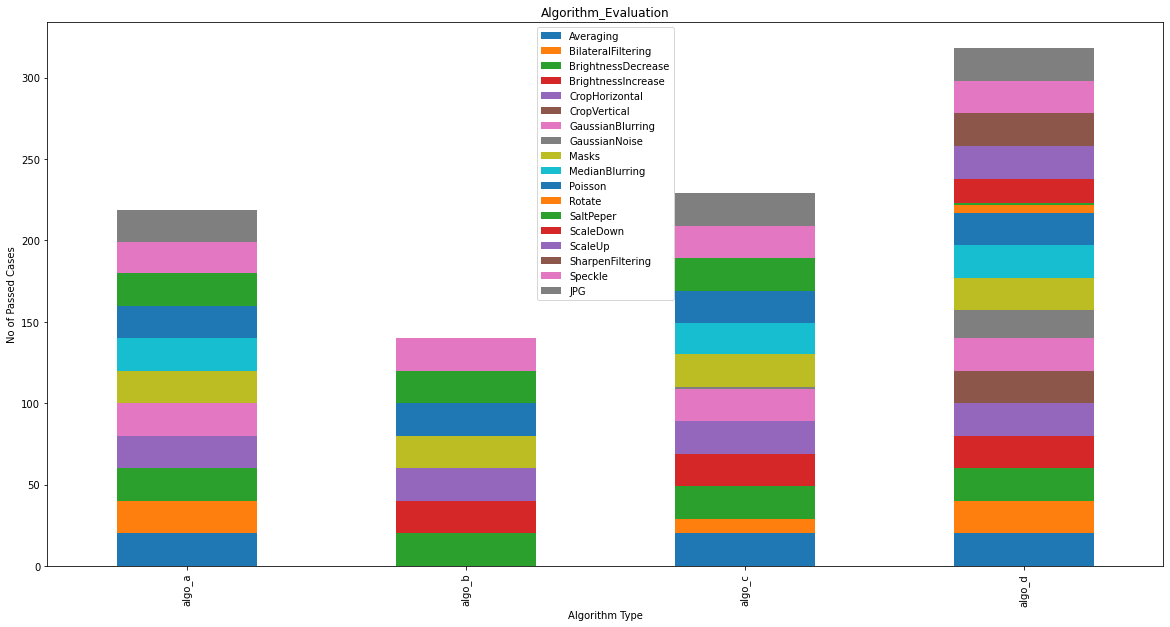

time: 938 ms (started: 2021-09-20 00:16:07 +08:00)


In [16]:
s = df_sum
p1 = s.plot(kind='bar', stacked=True, figsize=(20, 10), title='Algorithm_Evaluation', xlabel='Algorithm Type', ylabel='No of Passed Cases')
p1.legend(loc='upper center')

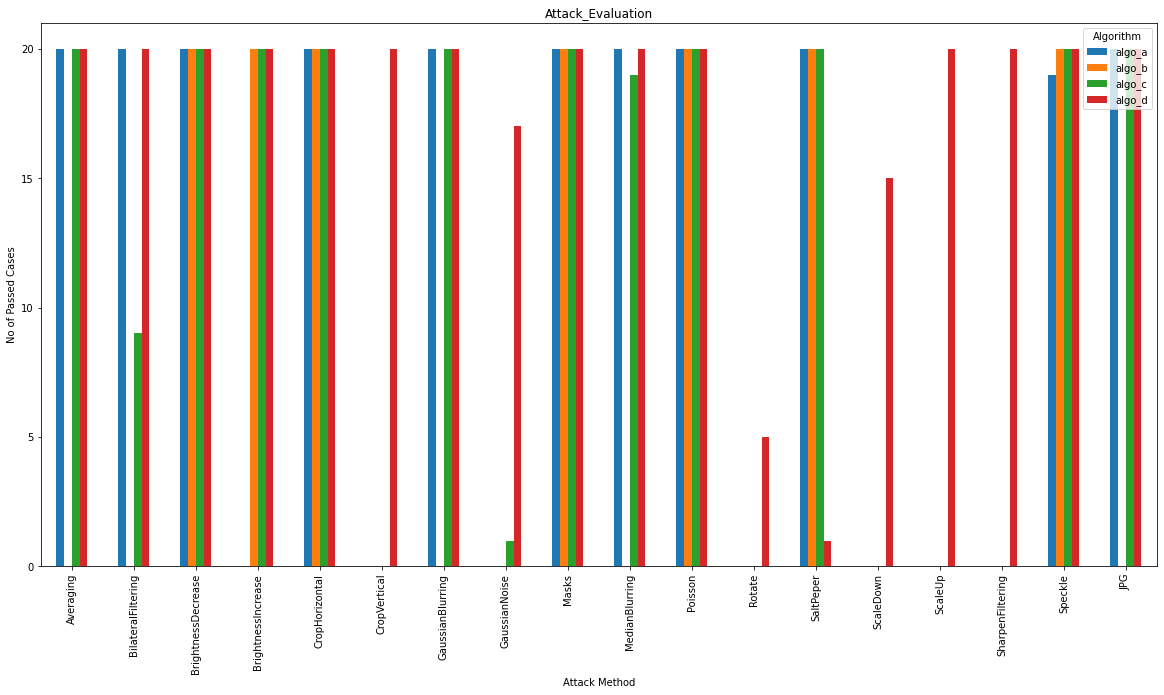

time: 766 ms (started: 2021-09-20 00:16:08 +08:00)


In [17]:
df_sum = df.groupby(['Algorithm']).sum()
df_sum_t = df_sum.transpose()
s = df_sum_t
p1 = s.plot(kind='bar', figsize=(20, 10), title='Attack_Evaluation', xlabel='Attack Method', ylabel='No of Passed Cases')
p1.yaxis.get_major_locator().set_params(integer=True)

# PSNR

In [18]:
import os
import cv2
import pandas as pd
from math import log10, sqrt
import numpy as np

time: 0 ns (started: 2021-09-20 00:16:09 +08:00)


In [19]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

time: 0 ns (started: 2021-09-20 00:16:09 +08:00)


### ORI VS ENCODED

In [42]:
folder_1 = os.path.join('in_img')
folder_2 = os.path.join('out_img')

original_img = os.listdir(folder_1)
encoded_img = os.listdir(folder_2)

time: 0 ns (started: 2021-09-20 00:21:10 +08:00)


In [43]:
list_1 = []
for item in original_img:
    img1 = cv2.imread(os.path.join(folder_1,item))
    list_1.append(img1)
   
list_2 = []
for folder in encoded_img: 
    img_list = os.listdir(os.path.join(folder_2,folder)) 
    
    for img_path in img_list: 
        img2 = cv2.imread(os.path.join(folder_2,folder,img_path))
        list_2.append(img2)
        
encoded_A = list_2[0:20]
encoded_B = list_2[20:40]
encoded_C = list_2[40:60]
encoded_D = list_2[60:80]

time: 844 ms (started: 2021-09-20 00:21:11 +08:00)


In [44]:
length = len(list_1)

list_M1_1 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_A[x]
    psnr_score_m1_1 = PSNR(img1, img2)
    list_M1_1.append(psnr_score_m1_1)
    
list_M1_2 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_B[x]
    psnr_score_m1_2 = PSNR(img1, img2)
    list_M1_2.append(psnr_score_m1_2)
    
list_M1_3 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_C[x]
    psnr_score_m1_3 = PSNR(img1, img2)
    list_M1_3.append(psnr_score_m1_3)
    
list_M1_4 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_D[x]
    psnr_score_m1_4 = PSNR(img1, img2)
    list_M1_4.append(psnr_score_m1_4)

time: 250 ms (started: 2021-09-20 00:21:15 +08:00)


In [23]:
df_M1 = pd.DataFrame(index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                            'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                            'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                            'MRI_S', 'MRI_T'])
df_M1['Encoded Algo A'] = list_M1_1
df_M1['Encoded Algo B'] = list_M1_2
df_M1['Encoded Algo C'] = list_M1_3
df_M1['Encoded Algo D'] = list_M1_4

df_M1

,Encoded Algo A,Encoded Algo B,Encoded Algo C,Encoded Algo D
MRI_A,35.235558,43.736332,46.975832,40.407926
MRI_B,35.264241,43.673936,46.941056,40.392352
MRI_C,35.236542,43.739201,47.001208,40.414981
MRI_D,35.248119,43.633610,46.921730,40.424273
MRI_E,35.256293,43.607840,46.924854,40.424904
MRI_F,35.483483,42.822696,44.768114,40.487141
MRI_G,35.179816,43.585932,46.897594,40.412936
MRI_H,35.272499,43.666232,46.937527,40.430422
MRI_I,35.185611,43.662848,46.975369,40.434533
MRI_J,35.185798,43.600485,46.919906,40.447968


time: 16 ms (started: 2021-09-20 00:16:10 +08:00)


In [72]:
output_path= os.path.join('table','df_M1.png')

df_M1.dfi.export(output_path)

time: 641 ms (started: 2021-09-20 00:44:20 +08:00)


### ENCODED VS ATTACKED 

In [24]:
folder_3 = os.path.join('out_img')
folder_4 = os.path.join('out_att')

encoded_img = os.listdir(folder_3)
attacked_img = os.listdir(folder_4)

time: 15 ms (started: 2021-09-20 00:16:10 +08:00)


In [25]:
list_3 = []
for folder in encoded_img: 
    img_list = os.listdir(os.path.join(folder_3,folder)) 
    
    for img_path in img_list: 
        img3 = cv2.imread(os.path.join(folder_3,folder,img_path))
        list_3.append(img3)
        
encoded_A = list_3[0:20]
encoded_B = list_3[20:40]
encoded_C = list_3[40:60]
encoded_D = list_3[60:80]

list_4 = []
for folder in attacked_img: 
    img_list = os.listdir(os.path.join(folder_4,folder)) 
    
    for infolder in img_list:
        in_list = os.listdir(os.path.join(folder_4,folder,infolder))
    
        for img_path in in_list: 
            img4 = cv2.imread(os.path.join(folder_4,folder,infolder,img_path))
            list_4.append(img4)

time: 13.3 s (started: 2021-09-20 00:16:10 +08:00)


### Algo A

In [26]:
#algorithm A

Algorithm_att_a = []
a_psnr_list = []
x=0

for y in encoded_A: #20 combination
    start=x+(x*71)
    end=18+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            a_psnr_list.append(PSNR(y,z)) # 20*18
        except:
            a_psnr_list.append('NaN')
    x=x+1

time: 906 ms (started: 2021-09-20 00:16:23 +08:00)


In [27]:
n = 20
list_M2_1 = []
len_1 = len(a_psnr_list)
for i in range(n):
    start = int(i*len_1/n)
    end = int((i+1)*len_1/n)
    list_M2_1.append(a_psnr_list[start:end])

time: 0 ns (started: 2021-09-20 00:16:24 +08:00)


In [28]:
df_M2_A = pd.DataFrame(list_M2_1, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M2_A

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,32.117124,32.754567,27.780344,27.994443,NaN,NaN,34.813590,28.422032,41.303914,31.896877,31.954123,27.515460,28.237683,34.865361,NaN,NaN,28.314520,29.986472
MRI_B,31.799591,32.518904,27.774114,27.934750,NaN,NaN,34.518200,28.410468,41.235844,33.491346,31.634789,27.497358,28.086630,34.877814,NaN,NaN,28.228897,29.994814
MRI_C,32.520081,33.063695,27.853581,27.986568,NaN,NaN,35.222158,28.403903,41.298685,31.849446,32.267207,27.491477,28.294484,34.755249,NaN,NaN,28.319291,30.537426
MRI_D,32.183493,32.706348,27.810577,27.931044,NaN,NaN,34.960652,28.408020,41.237652,31.608567,31.909111,27.491546,28.233314,34.832190,NaN,NaN,28.255875,30.449112
MRI_E,32.410746,32.811867,27.581762,27.644648,NaN,NaN,35.184670,28.405172,41.285853,32.878729,32.069170,27.473734,28.263903,34.699420,NaN,NaN,28.278760,31.060378
MRI_F,33.328137,33.527773,28.062084,28.085587,NaN,NaN,35.999152,28.400851,40.938221,32.738048,32.908823,27.458012,28.848092,34.662925,NaN,NaN,28.447180,32.967478
MRI_G,34.033543,33.934502,27.686084,27.767666,NaN,NaN,37.507623,28.392184,41.313855,32.688758,33.388422,27.456457,28.430778,34.823186,NaN,NaN,28.501737,30.503521
MRI_H,33.314117,33.268639,27.601963,27.720896,NaN,NaN,36.877036,28.398680,41.312534,31.860912,32.650297,27.469200,28.282381,34.719373,NaN,NaN,28.390956,30.363866
MRI_I,33.656610,33.434497,27.627045,27.690760,NaN,NaN,37.258478,28.389027,41.345052,32.403830,32.857229,27.450811,28.216085,34.749115,NaN,NaN,28.419109,30.721318
MRI_J,34.415676,34.132262,28.145483,28.214077,NaN,NaN,37.361116,28.395030,41.266095,32.812095,33.746502,27.456198,29.009338,34.713710,NaN,NaN,28.470619,31.352027


time: 47 ms (started: 2021-09-20 00:16:24 +08:00)


In [71]:
output_path= os.path.join('table','df_M2_A.png')

df_M2_A.dfi.export(output_path)

time: 1.44 s (started: 2021-09-20 00:43:58 +08:00)


### Algo B

In [29]:
#algorithm B
    
Algorithm_att_b = []
b_psnr_list = []
x=0

for y in encoded_B: #20 combination
    start=18+(x*72)
    end=36+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            b_psnr_list.append(PSNR(y,z)) # 20*18
        except:
            b_psnr_list.append('NaN')
    x=x+1

time: 906 ms (started: 2021-09-20 00:16:24 +08:00)


In [30]:
n = 20
list_M2_2 = []
len_2 = len(b_psnr_list)
for i in range(n):
    start = int(i*len_2/n)
    end = int((i+1)*len_2/n)
    list_M2_2.append(b_psnr_list[start:end])

time: 0 ns (started: 2021-09-20 00:16:25 +08:00)


In [31]:
df_M2_B = pd.DataFrame(list_M2_2, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M2_B

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,32.331482,33.025608,27.771647,27.994902,NaN,NaN,35.019968,28.422548,44.314787,31.877364,32.215374,27.517205,28.259544,34.827776,NaN,NaN,28.450205,30.021379
MRI_B,32.005746,32.769457,27.780364,27.949941,NaN,NaN,34.736317,28.411244,44.254120,32.934009,31.867089,27.501583,28.079076,34.875759,NaN,NaN,28.316204,30.033963
MRI_C,32.794409,33.422151,27.888291,28.026005,NaN,NaN,35.462038,28.402254,44.325786,33.415077,32.598040,27.493896,28.315062,34.792347,NaN,NaN,28.475830,30.570190
MRI_D,32.423699,32.996241,27.817148,27.949432,NaN,NaN,35.209386,28.409926,44.244014,32.050823,32.180436,27.490859,28.256861,34.861525,NaN,NaN,28.385082,30.485647
MRI_E,32.663958,33.113085,27.608154,27.673616,NaN,NaN,35.414886,28.402069,44.295845,32.214930,32.356961,27.478261,28.287780,34.771723,NaN,NaN,28.384122,31.106117
MRI_F,33.742334,34.024879,28.173139,28.195443,NaN,NaN,36.254654,28.401112,42.941381,32.295588,33.388792,27.460837,28.976289,34.625068,NaN,NaN,28.644218,33.051825
MRI_G,34.591630,34.512368,27.661545,27.747699,NaN,NaN,37.936606,28.392904,44.282992,32.308317,33.968876,27.458906,28.467799,34.826063,NaN,NaN,28.737853,30.549226
MRI_H,33.738913,33.693648,27.580794,27.714949,NaN,NaN,37.280838,28.395548,44.297370,32.968802,33.045036,27.464015,28.308088,34.725054,NaN,NaN,28.554788,30.404362
MRI_I,34.127065,33.892911,27.608531,27.687090,NaN,NaN,37.680630,28.387286,44.369075,32.637776,33.304726,27.456158,28.221485,34.697581,NaN,NaN,28.601184,30.775303
MRI_J,35.040912,34.787967,28.231860,28.299000,NaN,NaN,37.783767,28.390241,44.253398,31.792752,34.393283,27.456185,29.147752,34.725870,NaN,NaN,28.718932,31.396717


time: 47 ms (started: 2021-09-20 00:16:25 +08:00)


In [70]:
output_path= os.path.join('table','df_M2_B.png')

df_M2_B.dfi.export(output_path)

time: 1.47 s (started: 2021-09-20 00:43:42 +08:00)


### Algo C

In [32]:
#algorithm C
    
Algorithm_att_c = []
c_psnr_list = []
x=0

for y in encoded_C: #20 combination
    start=36+(x*72)
    end=54+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            c_psnr_list.append(PSNR(y,z)) # 20*18
        except:
            c_psnr_list.append('NaN')
    x=x+1

time: 937 ms (started: 2021-09-20 00:16:25 +08:00)


In [33]:
n = 20
list_M2_3 = []
len_3 = len(c_psnr_list)
for i in range(n):
    start = int(i*len_3/n)
    end = int((i+1)*len_3/n)
    list_M2_3.append(c_psnr_list[start:end])

time: 0 ns (started: 2021-09-20 00:16:26 +08:00)


In [34]:
df_M2_C = pd.DataFrame(list_M2_3, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M2_C

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,32.474119,33.194787,27.769678,27.987514,NaN,NaN,35.355393,28.420552,49.723238,32.722567,32.330000,27.518755,28.263060,34.812592,NaN,NaN,28.480889,30.012341
MRI_B,32.134906,32.928023,27.780224,27.944822,NaN,NaN,35.050179,28.411982,50.382826,32.497559,31.972597,27.499910,28.081391,34.886880,NaN,NaN,28.343976,30.032266
MRI_C,32.971979,33.615904,27.885269,28.020607,NaN,NaN,35.863243,28.408719,50.467233,33.207404,32.727855,27.489719,28.321786,34.801588,NaN,NaN,28.511968,30.571741
MRI_D,32.577179,33.163271,27.813893,27.941108,NaN,NaN,35.583828,28.401515,50.414008,32.765705,32.293471,27.479188,28.262666,34.860765,NaN,NaN,28.415210,30.491244
MRI_E,32.829597,33.279541,27.605937,27.669745,NaN,NaN,35.809741,28.396924,49.621318,32.451396,32.477054,27.469908,28.295203,34.733622,NaN,NaN,28.414539,31.124156
MRI_F,33.976378,34.233225,28.170790,28.193807,NaN,NaN,36.770655,28.399429,46.428265,32.140141,33.534786,27.461677,28.980826,34.630429,NaN,NaN,28.695678,33.045178
MRI_G,34.885389,34.765950,27.656592,27.742428,NaN,NaN,38.795900,28.396775,49.587892,32.257901,34.163860,27.454546,28.474048,34.788379,NaN,NaN,28.803197,30.554827
MRI_H,33.973519,33.898880,27.575696,27.708576,NaN,NaN,37.968913,28.392069,50.208415,32.648788,33.207988,27.462390,28.310055,34.668202,NaN,NaN,28.603570,30.412908
MRI_I,34.392710,34.105529,27.607650,27.685308,NaN,NaN,38.452824,28.388998,49.769111,33.081180,33.469738,27.459432,28.223362,34.758924,NaN,NaN,28.640754,30.777551
MRI_J,35.383876,35.062821,28.230583,28.294828,NaN,NaN,38.605682,28.387597,50.323207,32.243437,34.602686,27.454609,29.159451,34.693839,NaN,NaN,28.770259,31.417739


time: 47 ms (started: 2021-09-20 00:16:26 +08:00)


In [69]:
output_path= os.path.join('table','df_M2_C.png')

df_M2_C.dfi.export(output_path)

time: 1.44 s (started: 2021-09-20 00:43:35 +08:00)


### Algo D

In [35]:
#algorithm D

Algorithm_att_d = []
d_psnr_list = []
x=0

for y in encoded_D: #20 combination
    start=54+(x*72)
    end=72+(x*72)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            d_psnr_list.append(PSNR(y,z)) # 20*18
        except:
            d_psnr_list.append('NaN')
    x=x+1

time: 906 ms (started: 2021-09-20 00:16:26 +08:00)


In [36]:
n = 20
list_M2_4 = []
len_4 = len(d_psnr_list)
for i in range(n):
    start = int(i*len_4/n)
    end = int((i+1)*len_4/n)
    list_M2_4.append(d_psnr_list[start:end])

time: 0 ns (started: 2021-09-20 00:16:27 +08:00)


In [37]:
df_M2_D = pd.DataFrame(list_M2_4, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M2_D

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,32.389825,33.004342,27.770367,27.966556,NaN,NaN,35.240855,28.410441,43.458634,31.623545,32.192997,27.510257,28.251523,34.847300,NaN,NaN,28.416257,30.034902
MRI_B,32.057409,32.763584,27.759439,27.912355,NaN,NaN,34.943104,28.404872,43.425948,32.150476,31.857077,27.492288,28.078587,34.851894,NaN,NaN,28.304721,30.049008
MRI_C,32.865132,33.400716,27.881261,28.004245,NaN,NaN,35.732969,28.402209,43.506855,32.093748,32.569495,27.488370,28.300827,34.782506,NaN,NaN,28.449375,30.587241
MRI_D,32.498488,32.984625,27.817337,27.932001,NaN,NaN,35.459053,28.411026,43.477438,31.888425,32.162407,27.485885,28.250092,34.860587,NaN,NaN,28.370381,30.506204
MRI_E,32.739044,33.087672,27.596371,27.657219,NaN,NaN,35.682129,28.402843,43.490147,32.510690,32.341048,27.472108,28.275680,34.757492,NaN,NaN,28.373007,31.140670
MRI_F,33.837782,33.971042,28.195640,28.219484,NaN,NaN,36.659266,28.411754,42.788893,32.656147,33.325470,27.454211,28.905780,34.615712,NaN,NaN,28.631611,33.079183
MRI_G,34.693765,34.437013,27.637691,27.723433,NaN,NaN,38.532639,28.390663,43.557708,32.418179,33.892204,27.459463,28.445683,34.816062,NaN,NaN,28.704062,30.570669
MRI_H,33.821229,33.639548,27.569942,27.715298,NaN,NaN,37.740991,28.399327,43.568790,31.561183,33.013932,27.459457,28.297852,34.744441,NaN,NaN,28.534200,30.423554
MRI_I,34.218929,33.833771,27.610550,27.688641,NaN,NaN,38.210295,28.394590,43.540140,31.951427,33.245473,27.460985,28.229015,34.747304,NaN,NaN,28.581348,30.803980
MRI_J,35.154814,34.705729,28.242388,28.303079,NaN,NaN,38.347381,28.402342,43.468655,31.907244,34.308725,27.449910,29.081830,34.705771,NaN,NaN,28.669786,31.424977


time: 47 ms (started: 2021-09-20 00:16:27 +08:00)


In [65]:
output_path= os.path.join('table','d2_M2_D.png')

df_M2_D.dfi.export(output_path)

time: 1.47 s (started: 2021-09-20 00:42:15 +08:00)


# NCC

In [91]:
def ncc(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

time: 0 ns (started: 2021-09-20 00:57:46 +08:00)


### ORI VS ENCODED

In [92]:
folder_1 = os.path.join('in_img')
folder_2 = os.path.join('out_img')

original_img = os.listdir(folder_1)
encoded_img = os.listdir(folder_2)

time: 0 ns (started: 2021-09-20 00:57:48 +08:00)


In [93]:
list_1 = []
for item in original_img:
    img1 = cv2.imread(os.path.join(folder_1,item))
    list_1.append(img1)
   
list_2 = []
for folder in encoded_img: 
    img_list = os.listdir(os.path.join(folder_2,folder)) 
    
    for img_path in img_list: 
        img2 = cv2.imread(os.path.join(folder_2,folder,img_path))
        list_2.append(img2)
        
encoded_A = list_2[0:20]
encoded_B = list_2[20:40]
encoded_C = list_2[40:60]
encoded_D = list_2[60:80]

time: 875 ms (started: 2021-09-20 00:57:49 +08:00)


In [94]:
length = len(list_1)

list_M2_1 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_A[x]
    ncc_score_m2_1 = ncc(img1, img2)
    list_M2_1.append(ncc_score_m2_1)
    
list_M2_2 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_B[x]
    ncc_score_m2_2 = ncc(img1, img2)
    list_M2_2.append(ncc_score_m2_2)
    
list_M2_3 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_C[x]
    ncc_score_m2_3 = ncc(img1, img2)
    list_M2_3.append(ncc_score_m2_3)
    
list_M2_4 = []
for x in range(length):
    img1 = list_1[x]
    img2 = encoded_D[x]
    ncc_score_m2_4 = ncc(img1, img2)
    list_M2_4.append(ncc_score_m2_4)

time: 2.39 s (started: 2021-09-20 00:57:51 +08:00)


In [95]:
df_M2 = pd.DataFrame(index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                            'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                            'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                            'MRI_S', 'MRI_T'])
df_M2['Encoded Algo A'] = list_M2_1
df_M2['Encoded Algo B'] = list_M2_2
df_M2['Encoded Algo C'] = list_M2_3
df_M2['Encoded Algo D'] = list_M2_4

df_M2

,Encoded Algo A,Encoded Algo B,Encoded Algo C,Encoded Algo D
MRI_A,0.997347,0.999207,0.999809,0.999174
MRI_B,0.996901,0.999062,0.999775,0.999033
MRI_C,0.997443,0.999235,0.999817,0.999203
MRI_D,0.997276,0.999168,0.999802,0.999153
MRI_E,0.996327,0.998864,0.999731,0.998853
MRI_F,0.996184,0.998336,0.999175,0.998775
MRI_G,0.996538,0.998942,0.999749,0.998932
MRI_H,0.997621,0.999271,0.999826,0.999254
MRI_I,0.996659,0.998992,0.999762,0.998969
MRI_J,0.997546,0.999251,0.999823,0.999248


time: 16 ms (started: 2021-09-20 00:58:06 +08:00)


In [96]:
output_path= os.path.join('table','df_M2.png')

df_M2.dfi.export(output_path)

time: 625 ms (started: 2021-09-20 00:58:13 +08:00)


# NCC: Encode vs Attacked

In [97]:
folder_3 = os.path.join('out_img')
folder_4 = os.path.join('out_att')

encoded_img = os.listdir(folder_3)
attacked_img = os.listdir(folder_4)

list_3 = []
for folder in encoded_img: 
    img_list = os.listdir(os.path.join(folder_3,folder)) 
    
    for img_path in img_list: 
        img3 = cv2.imread(os.path.join(folder_3,folder,img_path))
        list_3.append(img3)
        
encoded_A = list_3[0:20]
encoded_B = list_3[20:40]
encoded_C = list_3[40:60]
encoded_D = list_3[60:80]

list_4 = []
for folder in attacked_img: 
    img_list = os.listdir(os.path.join(folder_4,folder)) 
    
    for infolder in img_list:
        in_list = os.listdir(os.path.join(folder_4,folder,infolder))
    
        for img_path in in_list: 
            img4 = cv2.imread(os.path.join(folder_4,folder,infolder,img_path))
            list_4.append(img4)

time: 13.1 s (started: 2021-09-20 00:58:15 +08:00)


### NCC Algo A

In [98]:
#algorithm A

Algorithm_att_a = []
a_ncc_list = []
x=0

for y in encoded_A: #20 combination
    start=x+(x*71)
    end=18+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            a_ncc_list.append(ncc(y,z)) # 20*18
        except:
            a_ncc_list.append('NaN')
    x=x+1

time: 9.26 s (started: 2021-09-20 00:58:28 +08:00)


In [99]:
n = 20
list_M3_1 = []
len_1 = len(a_ncc_list)
for i in range(n):
    start = int(i*len_1/n)
    end = int((i+1)*len_1/n)
    list_M3_1.append(a_ncc_list[start:end])

time: 0 ns (started: 2021-09-20 00:58:37 +08:00)


In [100]:
df_M3_A = pd.DataFrame(list_M3_1, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M3_A

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,0.985392,0.994456,0.999968,0.973228,NaN,NaN,0.993834,0.918119,0.999296,0.476290,0.974927,0.996363,0.643356,0.606604,NaN,NaN,0.884129,0.971409
MRI_B,0.985893,0.993147,0.999962,0.974900,NaN,NaN,0.994322,0.905694,0.999167,0.406427,0.978379,0.995983,0.595517,0.580909,NaN,NaN,0.859894,0.969182
MRI_C,0.986578,0.995059,0.999969,0.983156,NaN,NaN,0.994257,0.920987,0.999320,0.355128,0.976960,0.996746,0.612890,0.610647,NaN,NaN,0.890408,0.977893
MRI_D,0.987967,0.994237,0.999967,0.983138,NaN,NaN,0.994994,0.916857,0.999269,0.368456,0.980919,0.996604,0.668212,0.597947,NaN,NaN,0.877968,0.976419
MRI_E,0.986359,0.992379,0.999955,0.987080,NaN,NaN,0.994295,0.891387,0.999021,0.445134,0.981209,0.995625,0.553911,0.538083,NaN,NaN,0.853097,0.977862
MRI_F,0.981597,0.992813,0.999952,0.996740,NaN,NaN,0.990624,0.890729,0.998757,0.729180,0.974745,0.995579,0.649415,0.505200,NaN,NaN,0.864494,0.986292
MRI_G,0.993896,0.994907,0.999958,0.990628,NaN,NaN,0.997521,0.898236,0.999099,0.524484,0.991758,0.996180,0.660666,0.558685,NaN,NaN,0.906238,0.973309
MRI_H,0.987396,0.995807,0.999971,0.981831,NaN,NaN,0.993362,0.925472,0.999367,0.714963,0.992011,0.997206,0.694824,0.622124,NaN,NaN,0.923348,0.977998
MRI_I,0.992257,0.994468,0.999960,0.987012,NaN,NaN,0.996684,0.900929,0.999134,0.618273,0.987451,0.996330,0.670395,0.564346,NaN,NaN,0.904759,0.976616
MRI_J,0.995787,0.996422,0.999970,0.997536,NaN,NaN,0.998079,0.927170,0.999351,0.741410,0.994574,0.997316,0.841887,0.615961,NaN,NaN,0.916766,0.983344


time: 46 ms (started: 2021-09-20 00:58:37 +08:00)


In [101]:
output_path= os.path.join('table','df_M3_A.png')

df_M3_A.dfi.export(output_path)

time: 1.44 s (started: 2021-09-20 00:58:37 +08:00)


### NCC: Algo B

In [ ]:
#algorithm B
    
Algorithm_att_b = []
b_ncc_list = []
x=0

for y in encoded_B: #20 combination
    start=18+(x*72)
    end=36+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            b_ncc_list.append(ncc(y,z)) # 20*18
        except:
            b_ncc_list.append('NaN')
    x=x+1

In [ ]:
n = 20
list_M3_2 = []
len_2 = len(b_ncc_list)
for i in range(n):
    start = int(i*len_2/n)
    end = int((i+1)*len_2/n)
    list_M3_2.append(b_ncc_list[start:end])

In [ ]:
df_M3_B = pd.DataFrame(list_M3_2, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M3_B

In [ ]:
output_path= os.path.join('table','df_M3_B.png')

df_M3_B.dfi.export(output_path)

### NCC: Algo C

In [ ]:
#algorithm C
    
Algorithm_att_c = []
c_ncc_list = []
x=0

for y in encoded_C: #20 combination
    start=36+(x*72)
    end=54+(x*72)
#     print(start,end)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            c_ncc_list.append(ncc(y,z)) # 20*18
        except:
            c_ncc_list.append('NaN')
    x=x+1

In [ ]:
n = 20
list_M3_3 = []
len_3 = len(c_ncc_list)
for i in range(n):
    start = int(i*len_3/n)
    end = int((i+1)*len_3/n)
    list_M3_3.append(c_ncc_list[start:end])

In [ ]:
df_M3_C = pd.DataFrame(list_M3_3, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M3_C

In [ ]:
output_path= os.path.join('table','df_M3_C.png')

df_M3_C.dfi.export(output_path)

### NCC: Algo D

In [ ]:
#algorithm D

Algorithm_att_d = []
d_ncc_list = []
x=0

for y in encoded_D: #20 combination
    start=54+(x*72)
    end=72+(x*72)
    llist = list_4[start:end]    
    
    for z in llist: #18 combination
        try:
            d_ncc_list.append(ncc(y,z)) # 20*18
        except:
            d_ncc_list.append('NaN')
    x=x+1

In [ ]:
n = 20
list_M3_4 = []
len_4 = len(d_ncc_list)
for i in range(n):
    start = int(i*len_4/n)
    end = int((i+1)*len_4/n)
    list_M3_4.append(d_ncc_list[start:end])

In [89]:
df_M3_D = pd.DataFrame(list_M3_4, index=['MRI_A', 'MRI_B', 'MRI_C', 'MRI_D', 'MRI_E', 'MRI_F', 
                                          'MRI_G', 'MRI_H', 'MRI_I', 'MRI_J', 'MRI_K', 'MRI_L', 
                                          'MRI_M', 'MRI_N', 'MRI_O', 'MRI_P', 'MRI_Q', 'MRI_R', 
                                          'MRI_S', 'MRI_T'],
                                  columns=['Averaging','BilateralFiltering','BrightnessDecrease',
                                          'BrightnessIncrease','CropHorizontal','CropVertical',
                                          'GaussianBlurring','GaussianNoise','Masks','MedianBlurring',
                                          'Poisson','Rotate','SaltPeper','ScaleDown','ScaleUp',
                                          'SharpenFiltering','Speckle','JPG'])

df_M3_D

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
MRI_A,0.985953,0.994877,0.999968,0.975077,NaN,NaN,0.994163,0.917992,0.999570,0.466005,0.975402,0.996462,0.644961,0.605809,NaN,NaN,0.897173,0.971993
MRI_B,0.986639,0.993666,0.999962,0.976787,NaN,NaN,0.994742,0.905659,0.999495,0.259323,0.979171,0.996052,0.596821,0.576810,NaN,NaN,0.874029,0.969772
MRI_C,0.987133,0.995507,0.999969,0.984484,NaN,NaN,0.994584,0.921146,0.999590,0.581162,0.977455,0.996816,0.613861,0.610089,NaN,NaN,0.904672,0.978355
MRI_D,0.988601,0.994703,0.999967,0.984420,NaN,NaN,0.995359,0.916585,0.999562,0.594413,0.981572,0.996647,0.669722,0.598824,NaN,NaN,0.892408,0.976918
MRI_E,0.987176,0.992981,0.999955,0.988041,NaN,NaN,0.994760,0.891250,0.999408,0.356557,0.982125,0.995657,0.555994,0.538654,NaN,NaN,0.869203,0.978382
MRI_F,0.982636,0.993617,0.999951,0.997000,NaN,NaN,0.991185,0.891389,0.999157,0.786658,0.975967,0.995583,0.652026,0.501473,NaN,NaN,0.882537,0.986664
MRI_G,0.994695,0.995537,0.999958,0.991675,NaN,NaN,0.997972,0.897702,0.999460,0.324505,0.992636,0.996184,0.662888,0.556721,NaN,NaN,0.927227,0.973856
MRI_H,0.987955,0.996234,0.999971,0.983455,NaN,NaN,0.993679,0.925341,0.999622,0.593024,0.992626,0.997280,0.697580,0.622532,NaN,NaN,0.939080,0.978297
MRI_I,0.992996,0.995047,0.999959,0.988520,NaN,NaN,0.997112,0.900470,0.999474,0.800425,0.988241,0.996361,0.672542,0.560282,NaN,NaN,0.924902,0.977138
MRI_J,0.996357,0.996904,0.999970,0.997873,NaN,NaN,0.998407,0.927318,0.999608,0.357317,0.995183,0.997310,0.844744,0.606863,NaN,NaN,0.932850,0.983676


time: 47 ms (started: 2021-09-20 00:52:25 +08:00)


In [90]:
output_path= os.path.join('table','d2_M3_D.png')

df_M3_D.dfi.export(output_path)

time: 1.48 s (started: 2021-09-20 00:52:25 +08:00)
